In [1]:
import pandas as pd
import s3fs
from PIL import Image
import requests
from io import BytesIO
import time

In [2]:
multi = pd.read_csv('herbarium_multi.tsv', sep='\t')
multi.head()

,specimen_guid,media_guid,media_aws_id,edan_id,title,Barcode,ids_url,aws_url
0,http://n2t.net/ark:/65665/308ccbb87-e433-4990-...,http://n2t.net/ark:/65665/m3df156c21-4708-4494...,NMNH-00068526-000001,edanmdm-nmnhbotany_2156056,Lecidea pringlei Tuck.,68526.0,https://ids.si.edu/ids/deliveryService/id/ark:...,https://smithsonian-open-access.s3.amazonaws.c...
1,http://n2t.net/ark:/65665/308ccbb87-e433-4990-...,http://n2t.net/ark:/65665/m3ad097f00-e2e3-4ec0...,NMNH-00068526_02,edanmdm-nmnhbotany_2156056,Lecidea pringlei Tuck.,68526.0,https://ids.si.edu/ids/deliveryService/id/ark:...,https://smithsonian-open-access.s3.amazonaws.c...
2,http://n2t.net/ark:/65665/308ccbb87-e433-4990-...,http://n2t.net/ark:/65665/m3519636b0-dcc3-4611...,NMNH-00068526_03,edanmdm-nmnhbotany_2156056,Lecidea pringlei Tuck.,68526.0,https://ids.si.edu/ids/deliveryService/id/ark:...,https://smithsonian-open-access.s3.amazonaws.c...
3,http://n2t.net/ark:/65665/308ccbb87-e433-4990-...,http://n2t.net/ark:/65665/m34c69630c-b03f-492e...,NMNH-00068526_04,edanmdm-nmnhbotany_2156056,Lecidea pringlei Tuck.,68526.0,https://ids.si.edu/ids/deliveryService/id/ark:...,https://smithsonian-open-access.s3.amazonaws.c...
4,http://n2t.net/ark:/65665/312dee4d6-214d-4c7e-...,http://n2t.net/ark:/65665/m30234ce16-3c30-418c...,NMNH-00068546-000001,edanmdm-nmnhbotany_2131846,Lecidella crystallina M. Wirth & Vezda,68546.0,https://ids.si.edu/ids/deliveryService/id/ark:...,https://smithsonian-open-access.s3.amazonaws.c...


In [3]:
multi.head().to_dict(orient='records')

[{'specimen_guid': 'http://n2t.net/ark:/65665/308ccbb87-e433-4990-909e-300d712916c6',
  'media_guid': 'http://n2t.net/ark:/65665/m3df156c21-4708-4494-b117-443c3c5a1d60',
  'media_aws_id': 'NMNH-00068526-000001',
  'edan_id': 'edanmdm-nmnhbotany_2156056',
  'title': 'Lecidea pringlei Tuck.',
  'Barcode': 68526.0,
  'ids_url': 'https://ids.si.edu/ids/deliveryService/id/ark:/65665/m3df156c21-4708-4494-b117-443c3c5a1d60',
  'aws_url': 'https://smithsonian-open-access.s3.amazonaws.com/media/nmnh/NMNH-00068526-000001.jpg'},
 {'specimen_guid': 'http://n2t.net/ark:/65665/308ccbb87-e433-4990-909e-300d712916c6',
  'media_guid': 'http://n2t.net/ark:/65665/m3ad097f00-e2e3-4ec0-97ea-a1f079f0cde7',
  'media_aws_id': 'NMNH-00068526_02',
  'edan_id': 'edanmdm-nmnhbotany_2156056',
  'title': 'Lecidea pringlei Tuck.',
  'Barcode': 68526.0,
  'ids_url': 'https://ids.si.edu/ids/deliveryService/id/ark:/65665/m3ad097f00-e2e3-4ec0-97ea-a1f079f0cde7',
  'aws_url': 'https://smithsonian-open-access.s3.amazonaws

In [4]:
multi_sample = multi.sample(100)

In [5]:
ids_sample = multi_sample['ids_url'].to_list()
ids_sample[:5]

['https://ids.si.edu/ids/deliveryService/id/ark:/65665/m3ee045841-14a2-49c2-a98e-252de35d0168',
 'https://ids.si.edu/ids/deliveryService/id/ark:/65665/m3b17a666b-14e4-4b84-b5a5-1f04d11e6eb5',
 'https://ids.si.edu/ids/deliveryService/id/ark:/65665/m339efe579-cf0a-4237-bbc4-4bb752083f11',
 'https://ids.si.edu/ids/deliveryService/id/ark:/65665/m31445cac2-785b-4ecb-8693-de9161633d0b',
 'https://ids.si.edu/ids/deliveryService/id/ark:/65665/m30aadd86d-a347-461a-a9d2-cfccc505c88d']

In [6]:
def ids_ark_resize(ids_url):
    start_epoch = time.time()
    one = time.perf_counter()
    thumb_size = (500, 500)
    ark_id = ids_url.split('/')[-1]
    file_dest = f'thumbnails/{ark_id}.jpg'
    response = requests.get(ids_url)
    pil_image = Image.open(BytesIO(response.content))
    two = time.perf_counter()
    dl_time = two - one
    pil_image.thumbnail(thumb_size)
    pil_image.save(file_dest)
    three = time.perf_counter()
    resize_time = three - two
    end_epoch = time.time()
    return_dict = {'start_time':start_epoch,
                   'end_time':end_epoch,
                   'ids_url':ids_url,
                   'download_time':dl_time,
                   'resize_time':resize_time}
    return return_dict

In [7]:
ids_ark_resize(ids_sample[0])

{'start_time': 1626717350.922154,
 'end_time': 1626717353.910401,
 'ids_url': 'https://ids.si.edu/ids/deliveryService/id/ark:/65665/m3ee045841-14a2-49c2-a98e-252de35d0168',
 'download_time': 2.7741603959999996,
 'resize_time': 0.21401237700000042}

In [8]:
from dask.distributed import Client

In [9]:
from dask.system import CPU_COUNT
print(CPU_COUNT)

8


In [10]:
client = Client(threads_per_worker=2, n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:52294 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 17.18 GB


In [11]:
start = time.perf_counter()
futures = client.map(ids_ark_resize, ids_sample)
results = client.gather(futures)
end = time.perf_counter()
print(end - start)

62.534417951


In [12]:
results[:5]

[{'start_time': 1626717356.0487978,
  'end_time': 1626717365.311648,
  'ids_url': 'https://ids.si.edu/ids/deliveryService/id/ark:/65665/m3ee045841-14a2-49c2-a98e-252de35d0168',
  'download_time': 9.032948833999999,
  'resize_time': 0.22967505200000105},
 {'start_time': 1626717356.048924,
  'end_time': 1626717357.4058812,
  'ids_url': 'https://ids.si.edu/ids/deliveryService/id/ark:/65665/m3b17a666b-14e4-4b84-b5a5-1f04d11e6eb5',
  'download_time': 1.280408829,
  'resize_time': 0.07651394099999997},
 {'start_time': 1626717356.049388,
  'end_time': 1626717367.260896,
  'ids_url': 'https://ids.si.edu/ids/deliveryService/id/ark:/65665/m339efe579-cf0a-4237-bbc4-4bb752083f11',
  'download_time': 10.985552605999999,
  'resize_time': 0.22571964099999953},
 {'start_time': 1626717356.050747,
  'end_time': 1626717357.724961,
  'ids_url': 'https://ids.si.edu/ids/deliveryService/id/ark:/65665/m31445cac2-785b-4ecb-8693-de9161633d0b',
  'download_time': 1.5840401549999998,
  'resize_time': 0.0901319490

In [13]:
results_df = pd.DataFrame(results)
results_df.head()

,start_time,end_time,ids_url,download_time,resize_time
0,1.626717e+09,1.626717e+09,https://ids.si.edu/ids/deliveryService/id/ark:...,9.032949,0.229675
1,1.626717e+09,1.626717e+09,https://ids.si.edu/ids/deliveryService/id/ark:...,1.280409,0.076514
2,1.626717e+09,1.626717e+09,https://ids.si.edu/ids/deliveryService/id/ark:...,10.985553,0.225720
3,1.626717e+09,1.626717e+09,https://ids.si.edu/ids/deliveryService/id/ark:...,1.584040,0.090132
4,1.626717e+09,1.626717e+09,https://ids.si.edu/ids/deliveryService/id/ark:...,10.337460,0.207424


In [14]:
results_df['download_time'].sum()

472.21361211500005

<AxesSubplot:ylabel='Frequency'>

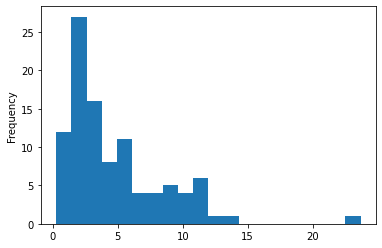

In [15]:
results_df['download_time'].plot.hist(bins=20)

In [29]:
def aws_download_thumbnail(aws_id):
    start_epoch = time.time()
    one = time.perf_counter()
    thumb_size = (500, 500)
    s3_url = f'smithsonian-open-access/media/nmnh/{aws_id}.jpg'
    file_dest = f'thumbnails/{aws_id}.jpg'
    one = time.perf_counter()
    with fs.open(s3_url,'rb') as s3_image:
        pil_image = Image.open(s3_image)
        two = time.perf_counter()
        dl_time = two - one
        width, height = pil_image.size
        pil_image.thumbnail(thumb_size)
        three = time.perf_counter()
        resize_time = three - two
        pil_image.save(file_dest)
    end_epoch = time.time()    
    return_dict = {'start_time':start_epoch,
                   'end_time':end_epoch,
                   'aws_url':s3_url,
                   'download_time':dl_time,
                   'original_width':width,
                   'original_heigh':height,
                   'resize_time':resize_time}    
    return return_dict

In [30]:
aws_sample = multi_sample['media_aws_id'].to_list()
aws_sample[:5]

['NMNH-00068517',
 'NMNH-00068974_04',
 'NMNH-00479433-000001',
 'NMNH-00406200_04',
 'NMNH-00068963']

In [18]:
fs = s3fs.S3FileSystem(anon=True)

In [31]:
aws_download_thumbnail(aws_sample[0])

{'start_time': 1626727585.541698,
 'end_time': 1626727588.675204,
 'aws_url': 'smithsonian-open-access/media/nmnh/NMNH-00068517.jpg',
 'download_time': 1.4813095610006712,
 'original_width': 3960,
 'original_heigh': 5020,
 'resize_time': 1.6415932139989309}

In [20]:
start = time.perf_counter()
futures = client.map(aws_download_thumbnail, aws_sample)
aws_results = client.gather(futures)
end = time.perf_counter()
print(end - start)

78.23628137300001


In [21]:
aws_results_df = pd.DataFrame(aws_results)
aws_results_df.head()

,start_time,end_time,aws_url,download_time,resize_time
0,1.626717e+09,1.626717e+09,smithsonian-open-access/media/nmnh/NMNH-000685...,6.593064,7.692269
1,1.626717e+09,1.626717e+09,smithsonian-open-access/media/nmnh/NMNH-000689...,5.969532,0.073981
2,1.626717e+09,1.626717e+09,smithsonian-open-access/media/nmnh/NMNH-004794...,6.564839,8.938944
3,1.626717e+09,1.626717e+09,smithsonian-open-access/media/nmnh/NMNH-004062...,5.719669,0.079559
4,1.626717e+09,1.626717e+09,smithsonian-open-access/media/nmnh/NMNH-000689...,5.997774,9.070885


In [22]:
aws_results_df['overall_time'] = aws_results_df['end_time'] - aws_results_df['start_time']
aws_results_df.head()

,start_time,end_time,aws_url,download_time,resize_time,overall_time
0,1.626717e+09,1.626717e+09,smithsonian-open-access/media/nmnh/NMNH-000685...,6.593064,7.692269,14.291665
1,1.626717e+09,1.626717e+09,smithsonian-open-access/media/nmnh/NMNH-000689...,5.969532,0.073981,6.048042
2,1.626717e+09,1.626717e+09,smithsonian-open-access/media/nmnh/NMNH-004794...,6.564839,8.938944,15.509512
3,1.626717e+09,1.626717e+09,smithsonian-open-access/media/nmnh/NMNH-004062...,5.719669,0.079559,5.804742
4,1.626717e+09,1.626717e+09,smithsonian-open-access/media/nmnh/NMNH-000689...,5.997774,9.070885,15.076122


In [23]:
aws_results_df['download_time'].sum()

285.975344243

<AxesSubplot:ylabel='Frequency'>

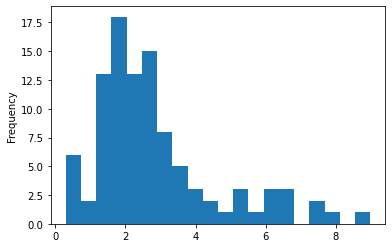

In [24]:
aws_results_df['download_time'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

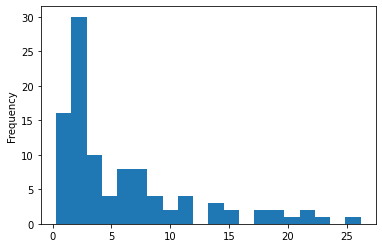

In [25]:
aws_results_df['overall_time'].plot.hist(bins=20)

In [26]:
aws_results_df.sort_values('overall_time', ascending = False).head().to_dict(orient='records')

[{'start_time': 1626717470.9036129,
  'end_time': 1626717497.0527701,
  'aws_url': 'smithsonian-open-access/media/nmnh/NMNH-01909378.jpg',
  'download_time': 3.6237884000000093,
  'resize_time': 22.519646730999995,
  'overall_time': 26.149157285690308},
 {'start_time': 1626717454.225353,
  'end_time': 1626717476.7134662,
  'aws_url': 'smithsonian-open-access/media/nmnh/NMNH-00873265_01.jpg',
  'download_time': 7.376795883999989,
  'resize_time': 15.105807842000004,
  'overall_time': 22.488113164901733},
 {'start_time': 1626717438.727299,
  'end_time': 1626717460.323405,
  'aws_url': 'smithsonian-open-access/media/nmnh/NMNH-01325210.jpg',
  'download_time': 1.555797468999998,
  'resize_time': 20.03408072900001,
  'overall_time': 21.59610605239868},
 {'start_time': 1626717479.3594491,
  'end_time': 1626717500.535153,
  'aws_url': 'smithsonian-open-access/media/nmnh/NMNH-Acevedo164032.jpg',
  'download_time': 3.193868715000008,
  'resize_time': 17.97618843500001,
  'overall_time': 21.1757

In [27]:
aws_results_df.sort_values('overall_time', ascending = True).head().to_dict(orient='records')

[{'start_time': 1626717439.1282508,
  'end_time': 1626717439.435199,
  'aws_url': 'smithsonian-open-access/media/nmnh/NMNH-F-42-09.jpg',
  'download_time': 0.2985164340000068,
  'resize_time': 8.195999996019054e-06,
  'overall_time': 0.306948184967041},
 {'start_time': 1626717444.447448,
  'end_time': 1626717444.883704,
  'aws_url': 'smithsonian-open-access/media/nmnh/NMNH-00517434.jpg',
  'download_time': 0.39788075499998854,
  'resize_time': 0.03385315200000605,
  'overall_time': 0.43625593185424805},
 {'start_time': 1626717439.43624,
  'end_time': 1626717439.977254,
  'aws_url': 'smithsonian-open-access/media/nmnh/NMNH-Acevedo65682.jpg',
  'download_time': 0.5172332660000052,
  'resize_time': 0.019457284999987223,
  'overall_time': 0.5410139560699463},
 {'start_time': 1626717482.145931,
  'end_time': 1626717482.787188,
  'aws_url': 'smithsonian-open-access/media/nmnh/NMNH-Acevedo79793-000001.jpg',
  'download_time': 0.6165672499999886,
  'resize_time': 0.01981413200000759,
  'overal

In [28]:
client.close()